In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# Dataset
from sklearn.datasets import load_wine

# Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


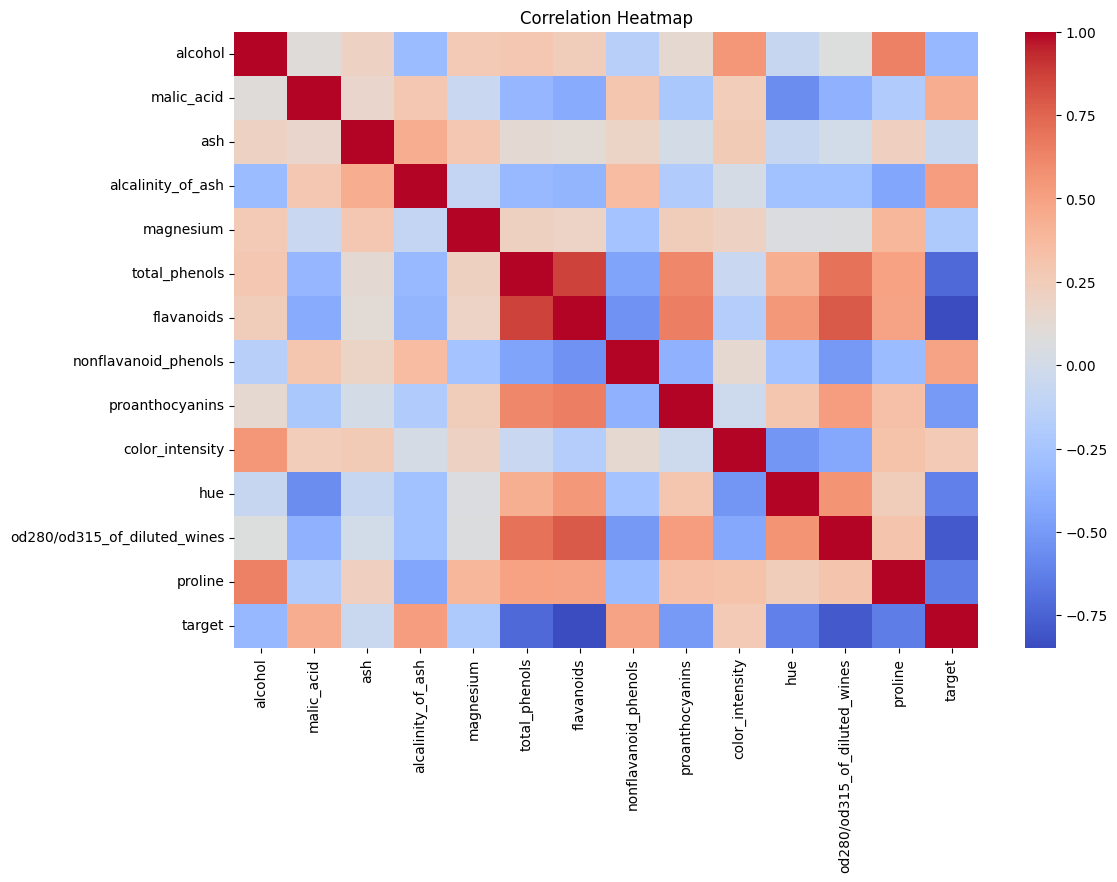

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [5]:
X = df.drop('target', axis=1)
y = df['target']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Baseline Model (Without PCA)
We train a Random Forest classifier using original scaled features.


In [8]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("Accuracy Before PCA:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Before PCA: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Applying PCA
Principal Component Analysis is applied to reduce dimensionality.


In [9]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)


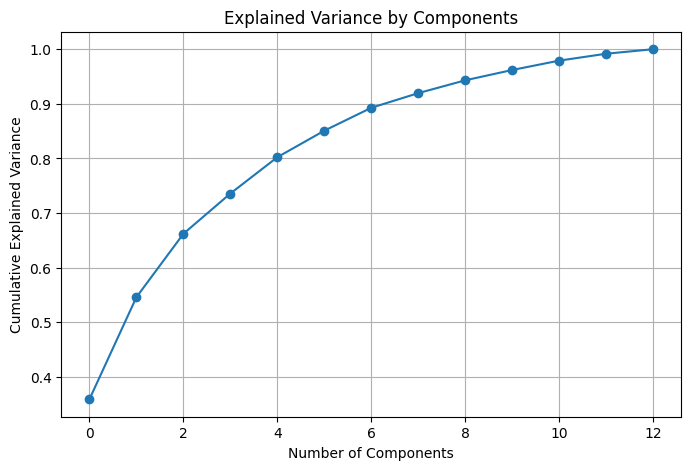

In [10]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.grid()
plt.show()


In [11]:
print("Total Explained Variance:", np.sum(pca.explained_variance_ratio_))


Total Explained Variance: 0.9999999999999998


In [12]:
pca = PCA(n_components=8)   

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original Shape:", X_train_scaled.shape)
print("Reduced Shape:", X_train_pca.shape)


Original Shape: (142, 13)
Reduced Shape: (142, 8)


In [13]:
rf_pca = RandomForestClassifier(random_state=42)

rf_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_pca.predict(X_test_pca)

print("Accuracy After PCA:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))


Accuracy After PCA: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



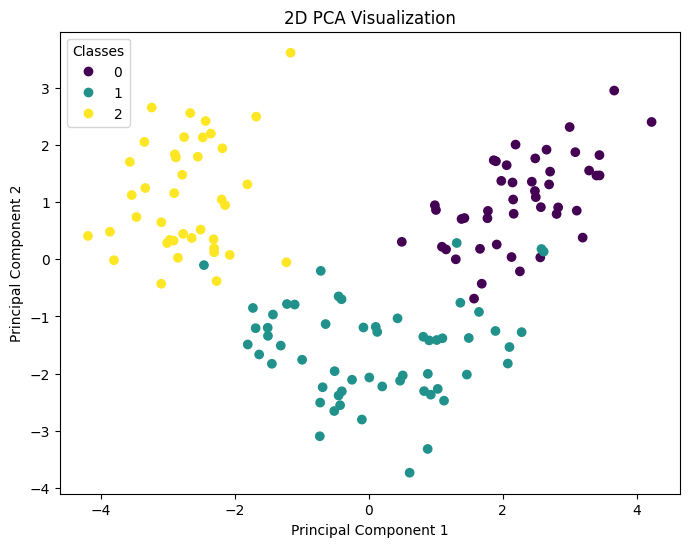

In [14]:
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y_train, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


In [15]:
import time

# Without PCA
start = time.time()
rf.fit(X_train_scaled, y_train)
end = time.time()
print("Training Time Without PCA:", end - start)

# With PCA
start = time.time()
rf_pca.fit(X_train_pca, y_train)
end = time.time()
print("Training Time With PCA:", end - start)


Training Time Without PCA: 0.09671759605407715
Training Time With PCA: 0.08404827117919922


In [16]:
print("Final Comparison")
print("------------------")
print("Accuracy Before PCA:", accuracy_score(y_test, y_pred))
print("Accuracy After PCA:", accuracy_score(y_test, y_pred_pca))


Final Comparison
------------------
Accuracy Before PCA: 1.0
Accuracy After PCA: 1.0


## Conclusion

- PCA reduced feature space
- Preserved most variance
- Accuracy remained stable
- Training efficiency improved
